In [1]:
from OpInf import *
import numpy as np
import scipy
import umap
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from matplotlib.colors import Normalize
from matplotlib.collections import LineCollection
from itertools import product, combinations

from sklearn.manifold import SpectralEmbedding

from pathlib import Path
import json
import stiefel

import importlib
importlib.reload(stiefel)

from scipy.io import loadmat
from operators import ckron, ckron_indices

import scienceplots
plt.style.use(["science", "no-latex", "grid"])

# set numpy random seed
np.random.seed(3)


check syl solve
True
here
True
6.980647614811093e-14
Use algebraic Stiefel log, metric alpha =  -0.0
dist 3.76991118430776
NORM TEST1: 0.0
NORM TEST2: 2.313036914780575e-13
NORM TEST3: 9.039644033315142e-15


In [ ]:
def initial_condition(mu, coord):
    if coord <= 0.5:
        return mu * np.sin(2 * np.pi * coord)
    
    return 0

In [ ]:
from Representation import *

In [ ]:
# mus = [1.1, 1.05, 1, 0.95, 0.9]
# mus = [1.15, 1.1, 1.05, 1, 0.95, 0.9, 0.85]
# mus = [0.4, 0.6, 0.8, 1.0, 1.2]
mus = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]
# Load data
T_end_train = 2 
dt= 1e-3
Train_T = int(T_end_train/dt)

# X_all_nominal = np.load("../examples/burgers/burgersFEniCSx_u_sol_all_RE1000.npy")[:, :Train_T+1, :]
# X_all_nominal = np.load("../examples/burgers/burgersFEniCSx_u_sol_all_RE1000_mu1.15_0.85.npy")[:, :Train_T+1, :]
# X_all_nominal = np.load("../examples/burgers/burgersFEniCSx_u_sol_all_RE1000_mu04_12.npy")[:, :Train_T+1, :]
X_all_nominal = np.load("../examples/burgers/burgersFEniCSx_u_sol_all_RE1000_mu0.4_0.1_1.2.npy")[:, :Train_T+1, :]
X_all_test = np.load("../examples/burgers/burgersFEniCSx_u_sol_RE1000_mu0.98.npy")[0]

In [ ]:
p = 2
Mp = len(mus)
dt = 1e-3
T_end = 2

config = {
    "N": 2**7 + 1 + 1,
    "dt": 1e-3,
    "T_end": T_end,
    "mus": list(mus),
    "Mp": Mp,
    "K": T_end / dt,  # T_end / dt
    "DS": 1,
    "params": {
        "modelform": "LQCP",
        "modeltime": "continuous",
        "dt": dt,
        "ddt_order": "4c",
        "p": p, # polynomial order
        "lambda1": 5e-2,
        "lambda2": 5e-2,
        "lambda3": 100,
    },
    "type": "single"
}




In [ ]:
np.random.randint(2, 5)

4

In [ ]:
mus

[0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]

In [ ]:
mus[1:-1]

[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1]

In [ ]:
list(combinations(mus[1:-1], 1))

[(0.5,), (0.6,), (0.7,), (0.8,), (0.9,), (1.0,), (1.1,)]

In [ ]:
# a colors list to tag the group of combinations
colors = plt.get_cmap('tab20').colors

# Create a dictionary to store combinations with their respective colors
tagged_combinations = {}

for r in range(1, len(mus) - 1):
    combinations_ = list(combinations(mus[1:-1], r))
    combinations_ = [(mus[0],) + combo + (mus[-1],) for combo in combinations_]
    print(f"{len(combinations_)} of combinations generated: ", combinations_)
    
    # Ensure that there are enough colors, cycle through colors if necessary
    color = colors[(r - 1) % len(colors)]
    
    # Store the combinations with their tag
    tagged_combinations[color] = combinations_
    
# Flatten the list and maintain the color tagging
flattened_tagged_combinations = [(item, color) for color, combos in tagged_combinations.items() for item in combos]

# Example of accessing the flattened list with color tags
for combo, color in flattened_tagged_combinations:
    print(f"Combination: {combo}, Color: {color}")

7 of combinations generated:  [(0.4, 0.5, 1.2), (0.4, 0.6, 1.2), (0.4, 0.7, 1.2), (0.4, 0.8, 1.2), (0.4, 0.9, 1.2), (0.4, 1.0, 1.2), (0.4, 1.1, 1.2)]
21 of combinations generated:  [(0.4, 0.5, 0.6, 1.2), (0.4, 0.5, 0.7, 1.2), (0.4, 0.5, 0.8, 1.2), (0.4, 0.5, 0.9, 1.2), (0.4, 0.5, 1.0, 1.2), (0.4, 0.5, 1.1, 1.2), (0.4, 0.6, 0.7, 1.2), (0.4, 0.6, 0.8, 1.2), (0.4, 0.6, 0.9, 1.2), (0.4, 0.6, 1.0, 1.2), (0.4, 0.6, 1.1, 1.2), (0.4, 0.7, 0.8, 1.2), (0.4, 0.7, 0.9, 1.2), (0.4, 0.7, 1.0, 1.2), (0.4, 0.7, 1.1, 1.2), (0.4, 0.8, 0.9, 1.2), (0.4, 0.8, 1.0, 1.2), (0.4, 0.8, 1.1, 1.2), (0.4, 0.9, 1.0, 1.2), (0.4, 0.9, 1.1, 1.2), (0.4, 1.0, 1.1, 1.2)]
35 of combinations generated:  [(0.4, 0.5, 0.6, 0.7, 1.2), (0.4, 0.5, 0.6, 0.8, 1.2), (0.4, 0.5, 0.6, 0.9, 1.2), (0.4, 0.5, 0.6, 1.0, 1.2), (0.4, 0.5, 0.6, 1.1, 1.2), (0.4, 0.5, 0.7, 0.8, 1.2), (0.4, 0.5, 0.7, 0.9, 1.2), (0.4, 0.5, 0.7, 1.0, 1.2), (0.4, 0.5, 0.7, 1.1, 1.2), (0.4, 0.5, 0.8, 0.9, 1.2), (0.4, 0.5, 0.8, 1.0, 1.2), (0.4, 0.5, 0.8, 1.1, 1.2), 

In [ ]:
def uncenter_augmented_X(augmented_X_centered, X_ref, dSdt_ref, n_X, dSdt):
    uncentered = []
    for X_mu_centered, dSdt_mu_centered in zip(np.array_split(augmented_X_centered, n_X, axis=1), dSdt):
        X_mu = X_mu_centered + X_ref
        dSdt_mu = dSdt_mu_centered + dSdt_ref
        uncentered.append(np.hstack([X_mu, dSdt_mu]))
    return np.hstack(uncentered)

[0, 1, 8]
[0, 2, 8]
[0, 3, 8]
[0, 4, 8]
[0, 5, 8]
[0, 6, 8]
[0, 7, 8]
[0, 1, 2, 8]
[0, 1, 3, 8]
[0, 1, 4, 8]
[0, 1, 5, 8]
[0, 1, 6, 8]
[0, 1, 7, 8]
[0, 2, 3, 8]
[0, 2, 4, 8]
[0, 2, 5, 8]
[0, 2, 6, 8]
[0, 2, 7, 8]
[0, 3, 4, 8]
[0, 3, 5, 8]
[0, 3, 6, 8]
[0, 3, 7, 8]
[0, 4, 5, 8]
[0, 4, 6, 8]
[0, 4, 7, 8]
[0, 5, 6, 8]
[0, 5, 7, 8]
[0, 6, 7, 8]
[0, 1, 2, 3, 8]
[0, 1, 2, 4, 8]
[0, 1, 2, 5, 8]
[0, 1, 2, 6, 8]
[0, 1, 2, 7, 8]
[0, 1, 3, 4, 8]
[0, 1, 3, 5, 8]
[0, 1, 3, 6, 8]
[0, 1, 3, 7, 8]
[0, 1, 4, 5, 8]
[0, 1, 4, 6, 8]
[0, 1, 4, 7, 8]
[0, 1, 5, 6, 8]
[0, 1, 5, 7, 8]
[0, 1, 6, 7, 8]
[0, 2, 3, 4, 8]
[0, 2, 3, 5, 8]
[0, 2, 3, 6, 8]
[0, 2, 3, 7, 8]
[0, 2, 4, 5, 8]
[0, 2, 4, 6, 8]
[0, 2, 4, 7, 8]
[0, 2, 5, 6, 8]
[0, 2, 5, 7, 8]
[0, 2, 6, 7, 8]
[0, 3, 4, 5, 8]
[0, 3, 4, 6, 8]
[0, 3, 4, 7, 8]
[0, 3, 5, 6, 8]
[0, 3, 5, 7, 8]
[0, 3, 6, 7, 8]
[0, 4, 5, 6, 8]
[0, 4, 5, 7, 8]
[0, 4, 6, 7, 8]
[0, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 8]
[0, 1, 2, 3, 5, 8]
[0, 1, 2, 3, 6, 8]
[0, 1, 2, 3, 7, 8]
[0, 1, 2, 4, 5, 8]
[0

scale =  0.02459887208820217
scale =  0.024598704342966064
scale =  0.024558083584954742
scale =  0.023359994672394004
scale =  0.024598839991740253
scale =  0.024598672246941893
scale =  0.0245580515948457
scale =  0.02335966329417076
scale =  0.02459863318588784
scale =  0.02455801266269081
scale =  0.023359276443424424
scale =  0.024557845474249215
scale =  0.023346027409537288
scale =  0.0228409655348742
scale =  0.024598810589245453
scale =  0.0245986428448481
scale =  0.024558022289777093
scale =  0.023359389592740722
scale =  0.024598603783887424
scale =  0.02455798335771512
scale =  0.0233590027510596
scale =  0.02455781616967253
scale =  0.02334575402755107
scale =  0.02284070385342314
scale =  0.024598571688125667
scale =  0.024557951367867197
scale =  0.023358671400977783
scale =  0.02455778418026017
scale =  0.023345423053229265
scale =  0.02284038704436599
scale =  0.02455774524895315
scale =  0.023345036673990002
scale =  0.022840017201402957
scale =  0.022827350493165217

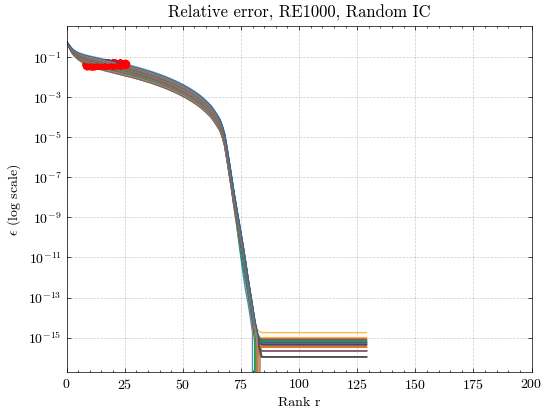

In [ ]:
X_nominal = np.concatenate([X for X in X_all_nominal], axis=0).T

# randomly draw 3 ICs (mus) without replacement from X_all_nominal
# X_all_nominals_lst = [X_all_nominal, X_all_nominal_2]
X_list = []
drawn_mus = [tup[0] for tup in flattened_tagged_combinations]
color_tags = []
for n_X in range(len(flattened_tagged_combinations)):
    mus_idx = [mus.index(mus_) for mus_ in flattened_tagged_combinations[n_X][0]]
    print(mus_idx)
    color_tags.append(flattened_tagged_combinations[n_X][1])
    X_list.append(np.concatenate([X_all_nominal[i] for i in mus_idx], axis=0).T)



augmented_X_list_centered = []
dSdt_list = []
augmented_X_list = []
# calculate the derivatives
for i in range(len(X_list)):
    
    X = X_list[i]
    X_ref = np.mean(X, axis=1)[:, None]
    
    Mp = len(drawn_mus[i])
    X_sep = np.array_split(X, Mp, axis=1)
    
    Nsnapshots = X.shape[1]
    Mp = len(drawn_mus[i])
    
    dSdt = []
    for j in range(Mp):
        start_ind = int((j) * Nsnapshots/Mp)
        end_ind = int((j+1) * Nsnapshots/Mp)
        # print("start_ind: ", start_ind)
        # print("end_ind: ", end_ind)
        ddts, ind = ddt(X[:, start_ind:end_ind], dt=dt, scheme="4c")
        ind = np.array(ind) + int((j) * Nsnapshots/Mp)
        dSdt.append(ddts)
    
    dSdt = np.array(dSdt)
    
    # check scale of dSdt, bring it to the same scale as X
    scale = np.max(np.mean(np.abs(X), axis=0)) / np.max(np.mean(np.abs(dSdt), axis=0))
    print("scale = ", scale)
    dSdt = dSdt * scale
    dSdt_ref = np.mean(np.concatenate(dSdt, axis=1), axis=1)[:, None]
    
    
    # augment the state space
    # augmented_X_centered = np.hstack([np.hstack([X_mu - X_ref, dSdt_mu - dSdt_ref]) for X_mu, dSdt_mu in zip(X_sep, dSdt)])
    augmented_X_centered = np.hstack([np.hstack([X_mu - X_ref for X_mu in X_sep]), np.hstack([dSdt_mu - dSdt_ref for dSdt_mu in dSdt])])
    augmented_X_list_centered.append(augmented_X_centered)
    # augmented_X = np.hstack([np.hstack([X_mu, dSdt_mu]) for X_mu, dSdt_mu in zip(X_sep, dSdt)])
    # augmented_X_list.append(augmented_X)
    dSdt_list.append(dSdt)

rob_lst = []
rel_err_SVD_lst = []
idx_lst = []
names = [f"mu={mus}" for mus in drawn_mus]

fig, ax = plt.subplots(figsize=(6, 4.5))

err_tol = 5e-2
# err_tol = 1e-1
# err_tol = 4e-1

for i in range(len(augmented_X_list_centered)):
    
    X_centered = augmented_X_list_centered[i]
    
    # svd
    U, S, V = np.linalg.svd((X_centered), full_matrices=False)
    # print("S = ", S[:5])
    eigvals_SVD = S**2 * (1 / (len(S) - 1))
    rob_lst.append(U)
    
    # calculate the relative error
    rel_err_SVD = 1 - (np.cumsum(eigvals_SVD) / np.sum(eigvals_SVD))
    rel_err_SVD_lst.append(rel_err_SVD)
    # print("rel_err_SVD = \n", rel_err_SVD[:4])

    # print the first idx when it is less than 1e-4
    idx = np.where(rel_err_SVD < err_tol)[0][0] + 1
    idx_lst.append(idx)
    print("idx = ", idx)
    print("rel_err_SVD[idx] = ", rel_err_SVD[idx])
    
    ax.plot(rel_err_SVD_lst[i], label=names[i], linestyle='-', alpha=0.7)
    ax.plot(idx, rel_err_SVD[idx], 'ro', label=f"{err_tol:.2e} at r={idx}, {names[i]}")
    ax.set_yscale('log')
    ax.set_ylabel("$\epsilon$ (log scale)")
    # set limit
    ax.set_xlim([0, 200])
    # ax.set_ylim([1e-13, 1e-3])
    # show grid
    ax.grid(True, alpha=0.2)
    ax.set_xlabel("Rank r")
    ax.set_title("Relative error, RE1000, Random IC")
    # ax.legend()

In [ ]:
# Model parameters
# r = np.max(idx_lst)
r = idx_lst[-1]
# r = 8
q_trunc = 2
# q_trunc = 16
# p = 3

tol = 1e-3      # tolerence for alternating minimization
gamma = 0.01       # regularization parameter
max_iter = 100  # maximum number of iterations

Vr_lst = []
Vbar_lst = []
Shat_lst = []
Xi_lst = []
Poly_lst = []

for i in range(len(X_list)):
    # Procustes problem for each mu
    X = X_list[i]
    num_snapshots = X.shape[1]
    print("num_snapshots: ", num_snapshots)
    print("X = ", X.shape)
    X_ref = np.mean(X, axis=1)[:, None]
    # X_ref = np.zeros((X.shape[0]))[:, None]
    X_centered = X - X_ref
    
    augmented_X_centered = augmented_X_list_centered[i]

    U, S, Vr = np.linalg.svd(augmented_X_centered, full_matrices=False)
    
    Vr = U[:, :r]
    Vbar = U[:, r:r + q_trunc]
    q = Vr.T @ X_centered
    Proj_error = X_centered - (Vr @ q)
    Poly = np.concatenate(polynomial_form(q, p), axis=0)
    Xi = Vbar.T @ Proj_error @ Poly.T @ np.linalg.inv(Poly @ Poly.T + gamma * np.identity((p - 1)*r))
    
    energy = np.linalg.norm(Vr @ q + (Vbar @ Xi @ Poly), 'fro')**2 / np.linalg.norm(X - X_ref, 'fro')**2
    
    print(f"Snapshot energy: {energy:e}")

    Gamma_MPOD = X_ref + (Vr @ q) + (Vbar @ Xi @ Poly)
    print(f"\nReconstruction error: {relative_error(X, Gamma_MPOD, X_ref):.4%}")
    
    Vr_lst.append(Vr)
    Vbar_lst.append(Vbar)
    Shat_lst.append(q)
    Xi_lst.append(Xi)
    Poly_lst.append(Poly)

    # q, energy, Xi, Vr, Vbar, Poly = alternating_minimization(X, X_ref, num_snapshots, max_iter, 1e-3, gamma, r, q_trunc, p, initial_Shat=None)
    
    # Vr_lst.append(Vr)
    # Vbar_lst.append(Vbar)
    # Shat_lst.append(q)
    # Xi_lst.append(Xi)
    # Poly_lst.append(Poly)

    # print("q = ", q.shape)
    # print("qbar = ", qbar.shape)

num_snapshots:  6003
X =  (130, 6003)
Snapshot energy: 9.959128e-01

Reconstruction error: 6.3875%
num_snapshots:  6003
X =  (130, 6003)
Snapshot energy: 9.958481e-01

Reconstruction error: 6.4375%
num_snapshots:  6003
X =  (130, 6003)
Snapshot energy: 9.957103e-01

Reconstruction error: 6.5439%
num_snapshots:  6003
X =  (130, 6003)
Snapshot energy: 9.955660e-01

Reconstruction error: 6.6536%
num_snapshots:  6003
X =  (130, 6003)
Snapshot energy: 9.954095e-01

Reconstruction error: 6.7705%
num_snapshots:  6003
X =  (130, 6003)
Snapshot energy: 9.952179e-01

Reconstruction error: 6.9109%
num_snapshots:  6003
X =  (130, 6003)
Snapshot energy: 9.950530e-01

Reconstruction error: 7.0296%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.957567e-01

Reconstruction error: 6.5095%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.956915e-01

Reconstruction error: 6.5594%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.955915e-01

Reconstruction error: 6.6353%
num_snapsh

Snapshot energy: 9.952317e-01

Reconstruction error: 6.9020%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.950663e-01

Reconstruction error: 7.0212%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.956364e-01

Reconstruction error: 6.6010%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.955235e-01

Reconstruction error: 6.6862%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.953672e-01

Reconstruction error: 6.8025%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.951533e-01

Reconstruction error: 6.9584%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.949858e-01

Reconstruction error: 7.0782%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.954152e-01

Reconstruction error: 6.7668%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.952568e-01

Reconstruction error: 6.8832%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.950453e-01

Reconstruction error: 7.0356%
num_snapshots:  8004
X =  (130, 8004)
Snapshot e

In [ ]:
# Aligning the signs of Vr_lst with Vr_lst[-1]
Vr1 = Vr_lst[-1]
for idx in range(len(Vr_lst) - 1):
    Vr_idx = Vr_lst[idx]
    for j in range(Vr_idx.shape[1]):
        dist1 = np.linalg.norm(Vr1[:, j] - Vr_idx[:, j])
        dist2 = np.linalg.norm(Vr1[:, j] + Vr_idx[:, j])
        if dist2 < dist1:
            Vr_lst[idx][:, j] = -Vr_lst[idx][:, j]

# for i in range(len(Vr_lst) - 1):
#     max_inds = np.argmax(Vr_lst[-1], axis=0) # max indexes for each column corresponding to the largest value in each column
#     for j in range(Vr_lst[i].shape[1]):
#         if np.sign(Vr_lst[i][max_inds[j], j]) != np.sign(Vr_lst[-1][max_inds[j], j]):
#             Vr_lst[i][:, j] = -Vr_lst[i][:, j]

# For Vbar_lst, ensuring sign agreement with Vbar_lst[-1]
Vbar1 = Vbar_lst[-1]
for idx in range(len(Vbar_lst) - 1):
    Vbar_idx = Vbar_lst[idx]
    for j in range(Vbar_idx.shape[1]):
        dist1 = np.linalg.norm(Vbar1[:, j] - Vbar_idx[:, j])
        dist2 = np.linalg.norm(Vbar1[:, j] + Vbar_idx[:, j])
        if dist2 < dist1:
            Vbar_lst[idx][:, j] = -Vbar_lst[idx][:, j]   

In [ ]:
V_combined_lst = [np.concatenate([Vr, Vbar], axis=1) for Vr, Vbar in zip(Vr_lst, Vbar_lst)]

# plot spectral embedding of the generated stiefel sampels
flat_Vr_arr = np.concatenate([rob.flatten()[:, None] for rob in Vr_lst], axis=1)
flat_Vbar_arr = np.concatenate([rob.flatten()[:, None] for rob in Vbar_lst], axis=1)
flat_V_combined_arr = np.concatenate([rob.flatten()[:, None] for rob in V_combined_lst], axis=1)

# colors = 
colors = plt.cm.tab20c(np.linspace(0, 1, len(Vr_lst)))


# Perform spectral embedding
embedder = SpectralEmbedding(n_components=2)
embedding_Vr = embedder.fit_transform(flat_Vr_arr.T)
embedding_Vbar = embedder.fit_transform(flat_Vbar_arr.T)

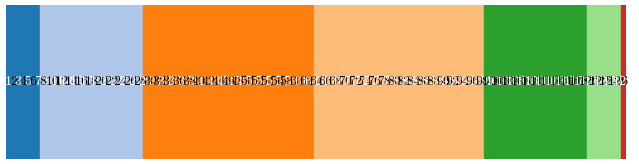

In [ ]:
# Create a figure and a subplot
fig, ax = plt.subplots(figsize=(8, 2))  # Adjust the figure size as needed

# Loop through the colors and plot each one as a rectangle
for i, color in enumerate(color_tags):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
    ax.text(i + 0.5, 0.5, str(i + 1), color='white' if i % 2 == 0 else 'black',
            horizontalalignment='center', verticalalignment='center')

# Set limits and remove axes for better visualization
ax.set_xlim(0, len(colors))
ax.set_ylim(0, 1)
ax.axis('off')

# Show the plot
plt.show()

In [ ]:
import importlib
import OpInf
# import reloading
# reload the whole OpInf module
importlib.reload(OpInf)
from OpInf import *


config['robparams'] = {
    "r": int(r)
}

operators_lst = []

# use each mu in between the min and max mu
for i in range(len(X_list) - 1):
    # X = X_list[i]
    # num_snapshots = X.shape[1]
    # print("num_snapshots: ", num_snapshots)
    # print("X = ", X.shape)
    
    mu_test = mus[2]
    
    X = X_list[i]
    X_ref = np.mean(X, axis=1)[:, None]
    X_centered = X - X_ref

    # U, S, Vr = np.linalg.svd(X_centered, full_matrices=False)
    
    Vr = Vr_lst[i]
    Vbar = Vbar_lst[i]
    q = Vr.T @ X_centered

    Mp = len(drawn_mus[i])
    print("Mp: ", Mp)
    
    Nsnapshots = X.shape[1]
    print("Nsnapshots: ", Nsnapshots)
    
    dShatdt = []
    Shat_lst = []
    dSdt = []
    for j in range(Mp):
        start_ind = int((j) * Nsnapshots/Mp)
        end_ind = int((j+1) * Nsnapshots/Mp)
        print("start_ind: ", start_ind)
        print("end_ind: ", end_ind)
        ddtshat, ind = ddt(q[:, start_ind:end_ind], dt=dt, scheme='4c')
        ddts, ind = ddt(X[:, start_ind:end_ind], dt=dt, scheme="4c")
        dShatdt.append(ddtshat)
        ind = np.array(ind) + int((j) * Nsnapshots/Mp)
        Shat_lst.append(q[:, ind])
        dSdt.append(ddts)

    # update config file with truncation order r
    config['robparams'] = {
        "r": int(r)
    }

    Shat_py = np.concatenate(Shat_lst, axis=1)
    dShatdt_py = np.concatenate(dShatdt, axis=1).T
    dSdt_py = np.hstack(dSdt)

    print("Shape of Shat_py: ", Shat_py.shape)
    print("Shape of dShatdt_py: ", dShatdt_py.shape)


    N = int(config['N'])
    dt = config['dt']
    T_end = config['T_end']
    K = int(config['K'])
    DS = config['DS']
    params = config['params']  # This will be a dictionary in Python
    robparams = config['robparams']  # This will be a dictionary in Python


    coord = np.linspace(0, 1, N)
    print("coord = ", coord.shape)
    IC = np.array([initial_condition(mu_test, c) for c in coord])
    q0 = Vr.T @ (IC[:, None] - X_ref).flatten()
    time_domain = np.arange(0, T_end, dt)
    train_size = Shat_py.shape[1] // len(mus)
    
    print("Train size: ", train_size)

    Shat_true = Shat_lst[2]
    # regs_product = [1e-3, 1e1, 3, 1e1, 1e4, 10, 1e1, 1e7, 7]

    # regs_product = [10, 10, 1, 43.939705607607905, 43.939705607607905, 1, 27.825594022071257, 27.825594022071257, 1] # for r=5
    # regs_product = [1e-1, 1e-1, 1, 1, 1000, 5, 1000, 100000, 3]
    # regs_product = [1e-1, 1e-1, 1, 300, 300, 1, 100000, 100000, 1] # r =8, 5e-2
    # regs_product = [1e-1, 1e-1, 1, 40000, 40000, 1, 1000000, 1000000, 1] # r =5, 1e-1
    regs_product = [1e-1, 1e-1, 1, 40000, 40000, 1, 1000000, 1000000, 1] # r =5, 1e-1

    regs, errors = train_gridsearch(Shat_py, dShatdt_py, Shat_true, train_size, r, regs_product, time_domain, q0, params, testsize=None, margin=1.1)
    
    print(f"Regularization params: {regs}, \t Error: {errors}")
    
    params['lambda1'] = regs[0]
    params['lambda2'] = regs[1]
    if len(regs) > 2:
        params['lambda3'] = regs[2]

    operators = infer_operators_nl(Shat_py, None, config['params'], dShatdt_py)
    
    operators_lst.append(operators)


Mp:  3
Nsnapshots:  6003
start_ind:  0
end_ind:  2001
start_ind:  2001
end_ind:  4002
start_ind:  4002
end_ind:  6003
Shape of Shat_py:  (25, 5991)
Shape of dShatdt_py:  (5991, 25)
coord =  (130,)
Train size:  665
Constructing least-squares solver, r=25
TRAINING 1 ROMS
(1/1) Testing ROM with (0.09999999999999999, 40000.00000000001, 1000000.0)
Generating ghat ...
drp:  950
Obtained data matrix...


Regularization parameters:  0.09999999999999999 40000.00000000001 1000000.0
Solving...
Solved!
Integrating...
Bound check passed
Regularization params: [0.09999999999999999, 40000.00000000001, 1000000.0], 	 Error: 0.9161865647219616
Generating ghat ...
drp:  950
Obtained data matrix...
Regularization parameters:  0.09999999999999999 40000.00000000001 1000000.0
Solving...
Solved!
Mp:  3
Nsnapshots:  6003
start_ind:  0
end_ind:  2001
start_ind:  2001
end_ind:  4002
start_ind:  4002
end_ind:  6003
Shape of Shat_py:  (25, 5991)
Shape of dShatdt_py:  (5991, 25)
coord =  (130,)
Train size:  665
Constructing least-squares solver, r=25
TRAINING 1 ROMS
(1/1) Testing ROM with (0.09999999999999999, 40000.00000000001, 1000000.0)
Generating ghat ...
drp:  950
Obtained data matrix...
Regularization parameters:  0.09999999999999999 40000.00000000001 1000000.0
Solving...
Solved!
Integrating...
Bound check passed
Regularization params: [0.09999999999999999, 40000.00000000001, 1000000.0], 	 Error: 0.906

In [ ]:
T_end_index = int(T_end/dt)

# Analyze difference in operators

In [ ]:
operators_lst[0].keys()

dict_keys(['A', 'F', 'N', 'B', 'C', 'P'])

In [ ]:
# for each operator compute pairwise difference in terms of Frobenius Norm, Spectral Norm, and Eigenvalue distances

operatorsA = []
operatorsF = []
operatorsC = []
operatorsP = []

# Extract matrices from the dictionaries
for dictionary in operators_lst:
    operatorsA.append(dictionary['A'])
    operatorsF.append(dictionary['F'])
    operatorsC.append(dictionary['C'])
    operatorsP.append(dictionary['P'])


# Function to compute the normalized Frobenius norm difference between two matrices
def normalized_frobenius_norm_difference(matrix_a, matrix_b):
    norm_a = np.linalg.norm(matrix_a, 'fro')
    norm_b = np.linalg.norm(matrix_b, 'fro')
    diff_norm = np.linalg.norm(matrix_a - matrix_b, 'fro')
    return diff_norm / max(norm_a, norm_b)

# Function to compute the normalized Spectral norm difference between two matrices
def normalized_spectral_norm_difference(matrix_a, matrix_b):
    norm_a = np.linalg.norm(matrix_a)
    norm_b = np.linalg.norm(matrix_b)
    diff_norm = np.linalg.norm(matrix_a - matrix_b)
    return diff_norm / max(norm_a, norm_b)


def pairwise_mat_distances(matrices, norm_function):
    num_matrices = len(matrices)
    
    # Initialize a 2D array with zeros
    pair_dist = np.zeros((num_matrices, num_matrices))
    
    for i in range(num_matrices):
        for j in range(i+1, num_matrices):
            matrix_a = matrices[i]
            matrix_b = matrices[j]
            norm_diff = norm_function(matrix_a, matrix_b)
            # Store the norm difference in the pair_dist array
            pair_dist[i][j] = norm_diff
            pair_dist[j][i] = norm_diff  # Since distance is symmetric

    return pair_dist

# Calculate pairwise distances for each type of operator and each norm
operatorsA_frobenius = pairwise_mat_distances(operatorsA, normalized_frobenius_norm_difference)
operatorsF_frobenius = pairwise_mat_distances(operatorsF, normalized_frobenius_norm_difference)
operatorsC_frobenius = pairwise_mat_distances(operatorsC, normalized_frobenius_norm_difference)
operatorsP_frobenius = pairwise_mat_distances(operatorsP, normalized_frobenius_norm_difference)

operatorsA_spectral = pairwise_mat_distances(operatorsA, normalized_spectral_norm_difference)
operatorsF_spectral = pairwise_mat_distances(operatorsF, normalized_spectral_norm_difference)
operatorsC_spectral = pairwise_mat_distances(operatorsC, normalized_spectral_norm_difference)
operatorsP_spectral = pairwise_mat_distances(operatorsP, normalized_spectral_norm_difference)

# Print or process the resulting distance matrices as needed
print("Pairwise Frobenius distances (A):")
print(operatorsA_frobenius)

print("Pairwise Spectral distances (A):")
print(operatorsA_spectral)

# Repeat for F, C, and P as needed


Pairwise Frobenius distances (A):
[[0.         0.04849638 0.80397468 ... 0.68791937 0.69075513 0.69193836]
 [0.04849638 0.         0.82394038 ... 0.68573977 0.68797861 0.68857412]
 [0.80397468 0.82394038 0.         ... 0.63371802 0.6347179  0.63486554]
 ...
 [0.68791937 0.68573977 0.63371802 ... 0.         0.01293101 0.0261624 ]
 [0.69075513 0.68797861 0.6347179  ... 0.01293101 0.         0.01427214]
 [0.69193836 0.68857412 0.63486554 ... 0.0261624  0.01427214 0.        ]]
Pairwise Spectral distances (A):
[[0.         0.04849638 0.80397468 ... 0.68791937 0.69075513 0.69193836]
 [0.04849638 0.         0.82394038 ... 0.68573977 0.68797861 0.68857412]
 [0.80397468 0.82394038 0.         ... 0.63371802 0.6347179  0.63486554]
 ...
 [0.68791937 0.68573977 0.63371802 ... 0.         0.01293101 0.0261624 ]
 [0.69075513 0.68797861 0.6347179  ... 0.01293101 0.         0.01427214]
 [0.69193836 0.68857412 0.63486554 ... 0.0261624  0.01427214 0.        ]]


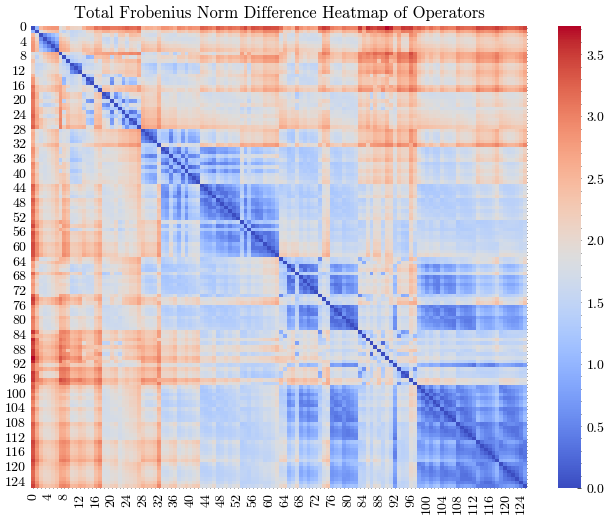

In [ ]:
# calculate total frobenius norm of operators
operators_total_frobenius = operatorsA_frobenius + operatorsF_frobenius + operatorsC_frobenius + operatorsP_frobenius

# Create a heatmap to visualize the distance matrix
num_matrices = len(operatorsA)
plt.figure(figsize=(8, 6))
# sns.heatmap(operatorsA_frobenius, annot=True, cmap='coolwarm', xticklabels=[f'Matrix {i+1}' for i in range(num_matrices)], yticklabels=[f'Matrix {i+1}' for i in range(num_matrices)])
sns.heatmap(operators_total_frobenius, cmap='coolwarm')
plt.title('Total Frobenius Norm Difference Heatmap of Operators')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering

clusterer = AgglomerativeClustering(n_clusters=2, metric="precomputed", linkage="average", distance_threshold=None)
clusters = clusterer.fit_predict(operators_total_frobenius)
print(clusters)

[1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Selected cluster 0


<Figure size 800x600 with 0 Axes>

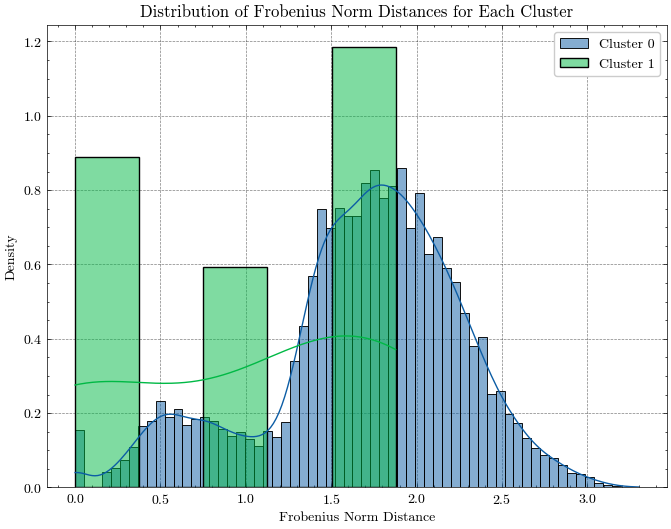

In [ ]:
# plot distribution of distances for each cluster
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# select the cluster with average less discrepancy
selected_cluster = 0
max_average_distance = np.inf
for i in range(max(clusters) + 1):
    cluster_indices = np.where(clusters == i)[0]
    cluster_distances = operators_total_frobenius[np.ix_(cluster_indices, cluster_indices)]
    average_distance = np.mean(cluster_distances)
    # if average distance is less than the maximum average distance and there is sufficient data points
    if average_distance < max_average_distance and len(cluster_indices) > int(0.1 * num_matrices):
        selected_cluster = i
    
    sns.histplot(cluster_distances.flatten(), ax=ax, label=f"Cluster {i}", stat='density', kde=True)

ax.set_title("Distribution of Frobenius Norm Distances for Each Cluster")
ax.set_xlabel("Frobenius Norm Distance")
ax.set_ylabel("Density")
ax.legend()

print(f"Selected cluster {selected_cluster}")

In [ ]:
# find 3 cluster representatives from the similar cluster (cluster 0)
representatives = []
cluster_indices = np.where(clusters == selected_cluster)[0]
cluster_distances = operators_total_frobenius[np.ix_(cluster_indices, cluster_indices)]
print(cluster_distances.shape)
representatives = np.argsort(operators_total_frobenius.sum(axis=1))[:3]

print(f"The top 3 most distinct operators are at indices: {representatives}")

(123, 123)
The top 3 most distinct operators are at indices: [76 77 80]


In [ ]:
# compute the pairwise distances between the 3 operators with the least total frobenius norm
pairwise_mat_distances([operatorsA[i] for i in representatives], normalized_frobenius_norm_difference)

array([[0.        , 0.04182672, 0.04143861],
       [0.04182672, 0.        , 0.00865087],
       [0.04143861, 0.00865087, 0.        ]])

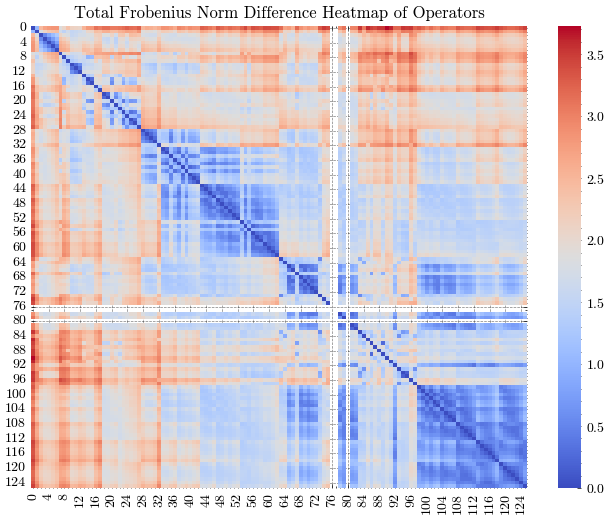

In [ ]:
# Initialize a mask of the same shape as your data with all False values
mask = np.zeros_like(operators_total_frobenius, dtype=bool)

# Set the values at the indices specified in `representatives` to True
for idx in representatives:
    mask[idx, :] = True
    mask[:, idx] = True

# Use this mask in the `sns.heatmap` function to highlight the cells
plt.figure(figsize=(8, 6))
sns.heatmap(operators_total_frobenius, cmap='coolwarm', mask=mask)
plt.title('Total Frobenius Norm Difference Heatmap of Operators')
plt.show()

# get distinct operators and evaluate

In [ ]:
import tqdm

abs_error_full_lst_operators = []
relative_error_testing_window_lst_operators = []
relative_error_training_window_lst_operators = []
s_rec_full_lst_operators = []

mu_test = 0.98

for i in tqdm.tqdm(range(len(X_list)-1)):
    
    operators = operators_lst[i]
    
    X = X_list[i]
    X_ref = np.mean(X, axis=1)[:, None]
    # X_centered = X - X_ref
    
    Vr = Vr_lst[i]
    Vbar = Vbar_lst[i]
    
    coord = np.linspace(0, 1, N)
    # print("coord = ", coord.shape)
    IC = np.array([initial_condition(mu_test, c) for c in coord])
    q0 = Vr.T @ (IC[:, None] - X_ref).flatten()
    
    T_end_full = 8
    time_domain_full = np.arange(0, T_end_full, dt)
    
    train_size = Shat_py.shape[1]

    multi_indices = generate_multi_indices_efficient(len(q0), p=p)
    
    out_full = scipy.integrate.solve_ivp(
                rhs,  # Integrate this function
                [time_domain_full[0], time_domain_full[-1]],  # over this time interval
                q0,  # from this initial condition
                t_eval=time_domain_full,  # evaluated at these points
                args=[operators, config['params'], None, multi_indices],  # additional arguments to rhs
            )
    
    s_hat_full = out_full.y
    poly_full = np.concatenate(polynomial_form(s_hat_full, p=p), axis=0)
    # Xi = Xi_lst[-1] # the nominal Xi
    Xi = Xi_lst[i]
    # print("Poly shape: ", poly_full.shape)

    s_rec_full = X_ref + Vr @ s_hat_full + Vbar @ Xi @ poly_full
    
    
    abs_error_full = np.abs(X_all_test.T - s_rec_full)
    relative_error_testing_window = np.linalg.norm(X_all_test.T[:, T_end_index:] - s_rec_full[:, T_end_index:], 'fro') / np.linalg.norm(X_all_test.T[:, T_end_index:], 'fro')
    relative_error_training_window = np.linalg.norm(X_all_test.T[:, :T_end_index] - s_rec_full[:, :T_end_index], 'fro') / np.linalg.norm(X_all_test.T[:, :T_end_index], 'fro')
    
    abs_error_full_lst_operators.append(abs_error_full)
    relative_error_testing_window_lst_operators.append(relative_error_testing_window)
    relative_error_training_window_lst_operators.append(relative_error_training_window)
    s_rec_full_lst_operators.append(s_rec_full)
    
    

100%|██████████| 126/126 [01:34<00:00,  1.33it/s]


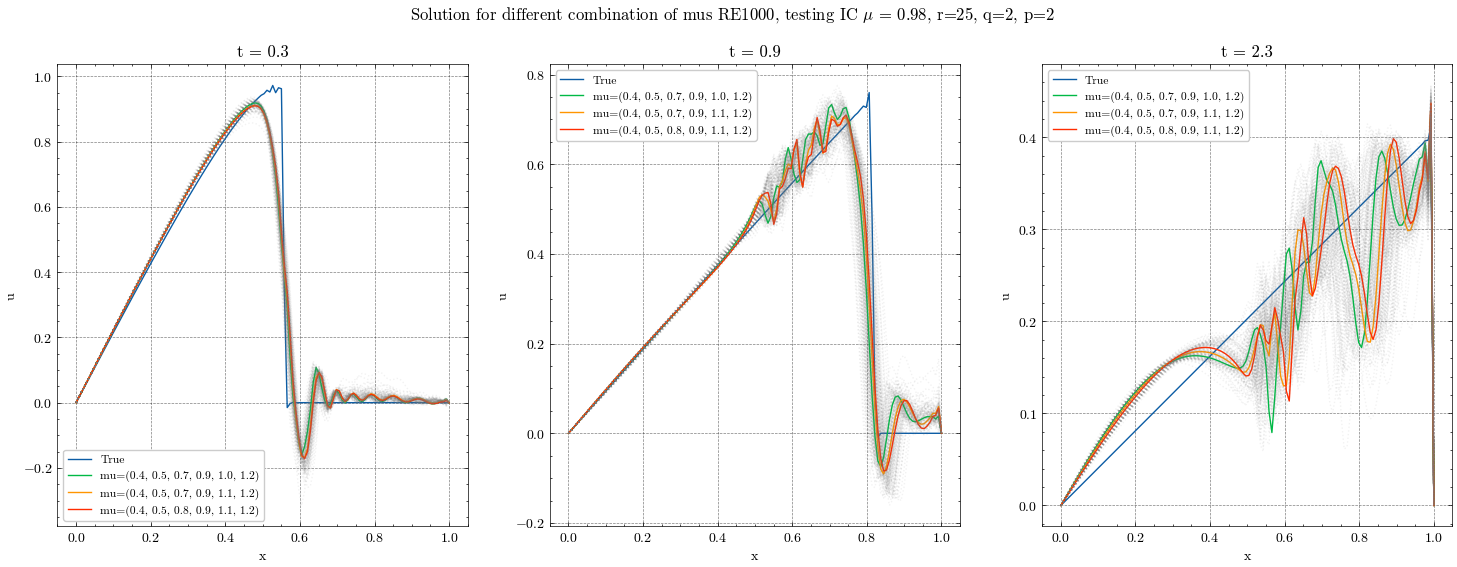

In [ ]:
times = [0.3, 0.9, 2.3]

# Example setup (you'll need to define mean_s_rec_full, lower_bound, and upper_bound appropriately)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

colors = plt.cm.tab20(np.linspace(0, 1, len(X_list)))

for i, t in enumerate(times):
    ax = axs[i]
    t_index = int(t / dt)  # Ensure dt is defined and properly calculated

    # Main plot
    x_values = np.linspace(0, 1, s_rec_full_lst_operators[0].shape[0])
    
    ax.plot(x_values, X_all_test.T[:, t_index], label="True", linestyle='-', alpha=1)
    for j in range(len(X_list)-1):
        ax.plot(x_values, s_rec_full_lst_operators[j][:, t_index], linestyle=':', alpha=0.1, color='grey')
        
        if j in representatives:
            ax.plot(x_values, s_rec_full_lst_operators[j][:, t_index], label=names[j], linestyle='-', alpha=1)
            
        # if j in anomalous_idx_iso:
        #     ax.plot(x_values, s_rec_full_lst_operators[j][:, t_index], label=names[j], linestyle='--', alpha=1, color=colors[j])
    
    ax.set_title(f"t = {t}")
    ax.set_xlabel('x')
    ax.set_ylabel('u')
    ax.legend(loc="best", fontsize='small')
    
plt.suptitle(f"Solution for different combination of mus RE1000, testing IC $\mu$ = 0.98, r={r}, q={q_trunc}, p={p}")
plt.show()


In [ ]:
np.concatenate([dSdt_list[i] for i in representatives], axis=0).shape

(18, 130, 1997)

In [ ]:
# choose the distinct operators from clustering
V_combined_lst_stochastic = []
Vr_lst_sel = []
Vbar_lst_sel = []

for i in representatives:
    assert(np.allclose(V_combined_lst[i][:, :r], Vr_lst[i]))
    assert(np.allclose(V_combined_lst[i][:, r:], Vbar_lst[i]))
    V_combined_lst_stochastic.append(V_combined_lst[i])
    Vr_lst_sel.append(Vr_lst[i])
    Vbar_lst_sel.append(Vbar_lst[i])    

augmented_X_global_centered = []
X_ref_global = np.mean(np.concatenate([X_list[i] for i in representatives], axis=1), axis=1)[:, None]
dSdt_ref_global = np.mean(np.concatenate(np.concatenate([dSdt_list[i] for i in representatives], axis=0), axis=1), axis=1)[:, None]
for index in representatives:
    n_X = len(drawn_mus[index])
    X_sep = np.array_split(X_list[index], n_X, axis=1)
    # augmented_X_global_centered.append(np.hstack([np.hstack([X_mu - X_ref_global, dSdt_mu - dSdt_ref_global]) for X_mu, dSdt_mu in zip(X_sep, dSdt_list[index])]))
    augmented_X_global_centered.append(
        np.hstack([np.hstack([X_mu - X_ref_global for X_mu in X_sep]), np.hstack([dSdt_mu - dSdt_ref_global for dSdt_mu in dSdt_list[index]])])
    )

augmented_X_all_global_centered = np.hstack(augmented_X_global_centered)

# augmented_X_all_global_centered = np.hstack([augmented_X_list_centered[i] for i in representatives])

V_combined_global = np.linalg.svd(augmented_X_all_global_centered, full_matrices=False)[0][:, :r+q_trunc]
V_combined_lst_stochastic.append(V_combined_global)
Vr_lst_sel.append(V_combined_global[:, :r])
Vbar_lst_sel.append(V_combined_global[:, r:])

In [ ]:
# now align the signs of Vr_lst_sel with Vr_lst_sel[-1]
Vr1 = Vr_lst_sel[-1]

for idx in range(len(Vr_lst_sel) - 1):
    Vr_idx = Vr_lst_sel[idx]
    for j in range(Vr_idx.shape[1]):
        dist1 = np.linalg.norm(Vr1[:, j] - Vr_idx[:, j])
        dist2 = np.linalg.norm(Vr1[:, j] + Vr_idx[:, j])
        if dist2 < dist1:
            Vr_lst_sel[idx][:, j] = -Vr_lst_sel[idx][:, j]

# Aligning the signs of Vr_lst_sel with Vr_lst_sel[-1]
Vbar1 = Vbar_lst_sel[-1]

for idx in range(len(Vbar_lst_sel) - 1):
    Vbar_idx = Vbar_lst_sel[idx]
    for j in range(Vbar_idx.shape[1]):
        dist1 = np.linalg.norm(Vbar1[:, j] - Vbar_idx[:, j])
        dist2 = np.linalg.norm(Vbar1[:, j] + Vbar_idx[:, j])
        if dist2 < dist1:
            Vbar_lst_sel[idx][:, j] = -Vbar_lst_sel[idx][:, j]

# Aligning signs for V_combined_lst_stochastic
V_combined1 = V_combined_lst_stochastic[-1]

for idx in range(len(V_combined_lst_stochastic) - 1):
    V_combined_idx = V_combined_lst_stochastic[idx]
    for j in range(V_combined_idx.shape[1]):
        dist1 = np.linalg.norm(V_combined1[:, j] - V_combined_idx[:, j])
        dist2 = np.linalg.norm(V_combined1[:, j] + V_combined_idx[:, j])
        if dist2 < dist1:
            V_combined_lst_stochastic[idx][:, j] = -V_combined_lst_stochastic[idx][:, j]
            
assert(np.allclose(V_combined_lst_stochastic[0][:, :r], Vr_lst_sel[0]))

In [ ]:
# change the names too
names_sel = [names[i] for i in representatives]
names_sel.append("Global")

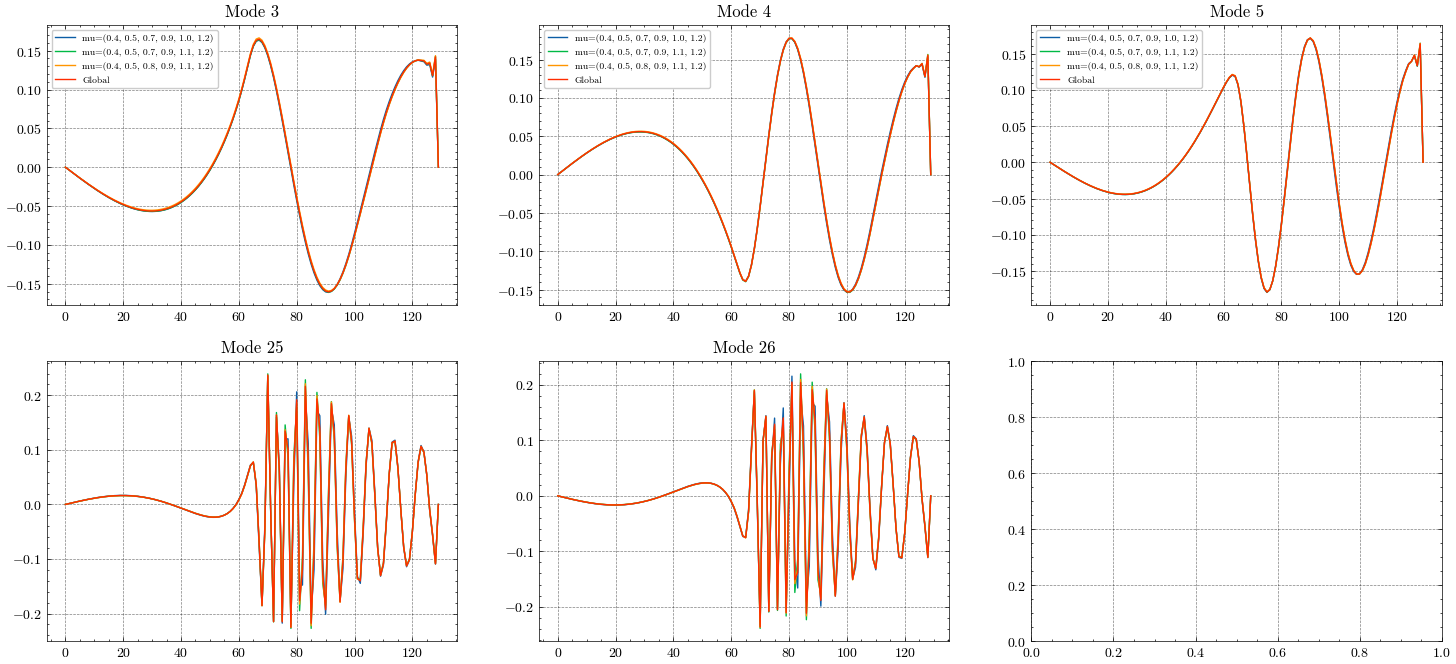

In [ ]:
# plot the modes of the aligned signs modes
n_modes_viz = 3
fig, axs = plt.subplots(2, n_modes_viz, figsize=(18, 8))
for i in range(n_modes_viz):
    for j in range(len(V_combined_lst_stochastic)):
        axs[0, i].plot(V_combined_lst_stochastic[j][:, i+3], label=names_sel[j])
        axs[0, i].legend(fontsize='x-small')
    axs[0, i].set_title(f"Mode {i+3}")

for i in range(2):
    for j in range(len(V_combined_lst_stochastic)):
        axs[1, i].plot(V_combined_lst_stochastic[j][:, r + i], label=names_sel[j])
    axs[1, i].set_title(f"Mode {r + i}")

In [ ]:
import numpy as np
import itertools
from stiefel import *
import importlib
importlib.reload(stiefel)

N_stiefel_samples = 1000

# the global ROB as reference base point
U0 = V_combined_lst_stochastic[-1]

# number of models excluding the global ROB
num_models = len(V_combined_lst_stochastic) - 1

# rob has shape (num_models, n_points, n), where n_points is the number of points and n is the number of eigenvectors (order of samples)
n_points = V_combined_lst_stochastic[0].shape[0]
n = V_combined_lst_stochastic[0].shape[1]

# get the tangent vectors deltas
tau=0.00001
Deltas = batch_stiefel_log(U0, V_combined_lst_stochastic, tau=tau, metric_alpha=0)

# calculate condiiton number of the matrix H in the quadratic programming problem
X = np.reshape(Deltas[:num_models, :, :], (num_models, -1))
H = X @ X.T

print("Condition number: ", np.linalg.cond(H))

Use algebraic Stiefel log, metric alpha =  0
Use algebraic Stiefel log, metric alpha =  0
Use algebraic Stiefel log, metric alpha =  0
Use algebraic Stiefel log, metric alpha =  0
Condition number:  868.3695797083363


In [ ]:
# Generate the samples and split them into two arrays
stiefel_samples_combined, maxI, beta = stiefel.gen_stiefel_samples(N_stiefel_samples, V_combined_lst_stochastic, tau=0.00001, metric_alpha=0.0000000000)

# # Align signs of stiefel samples with global ROB
for i in range(len(stiefel_samples_combined)):
    stiefel_samples_combined_idx = stiefel_samples_combined[i]
    for j in range(V_combined_idx.shape[1]):
        dist1 = np.linalg.norm(U0[:, j] - stiefel_samples_combined_idx[:, j])
        dist2 = np.linalg.norm(U0[:, j] + stiefel_samples_combined_idx[:, j])
        if dist2 < dist1:
            stiefel_samples_combined_idx[i][:, j] = -stiefel_samples_combined_idx[i][:, j]
    

stiefel_samples_Vr = np.array([sample[:, :r] for sample in stiefel_samples_combined])
stiefel_samples_Vbar = np.array([sample[:, r:r+q_trunc] for sample in stiefel_samples_combined])

Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
                                     CVXPY                                     
                                     v1.4.2                                    
(CVXPY) May 29 06:24:13 AM: Your problem has 3 variables, 2 constraints, and 0 parameters.
(CVXPY) May 29 06:24:13 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 29 06:24:13 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 29 06:24:13 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 29 06:24:13 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation

In [ ]:
frechet_mean = calc_frechet_mean_mat(stiefel_samples_combined, V_combined_lst_stochastic[-1], eps=1e-2, tau=1e-3)

Vr_frechet_mean = frechet_mean[0][:, :r]
Vbar_frechet_mean = frechet_mean[0][:, r:+r+q_trunc]

Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic

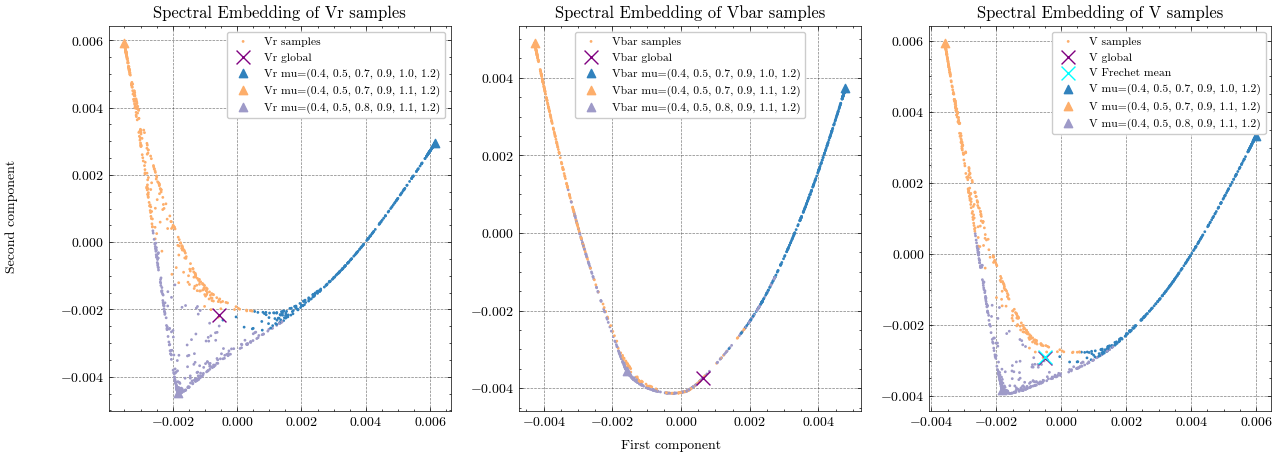

In [ ]:
# plot spectral embedding of the generated stiefel sampels
flat_Vr_arr = np.concatenate([rob.flatten()[:, None] for rob in Vr_lst_sel], axis=1)
flat_Vbar_arr = np.concatenate([rob.flatten()[:, None] for rob in Vbar_lst_sel], axis=1)
flat_V_combined_arr = np.concatenate([rob.flatten()[:, None] for rob in V_combined_lst_stochastic], axis=1)
flat_Vr_frechet_mean = Vr_frechet_mean.flatten()[:, None]
flat_Vbar_frechet_mean = Vbar_frechet_mean.flatten()[:, None]
rob_Vr_all = np.concatenate([rob.flatten()[:, None] for rob in stiefel_samples_Vr] + [flat_Vr_arr] + [flat_Vr_frechet_mean], axis=1)
rob_Vbar_all = np.concatenate([rob.flatten()[:, None] for rob in stiefel_samples_Vbar] + [flat_Vbar_arr] + [flat_Vbar_frechet_mean], axis=1)
rob_V_combined_all = np.concatenate([rob.flatten()[:, None] for rob in stiefel_samples_combined] + [flat_V_combined_arr] + [frechet_mean[0].flatten()[:, None]], axis=1)

from sklearn.manifold import SpectralEmbedding
import matplotlib.pyplot as plt

colors = plt.cm.tab20c(np.linspace(0, 1, len(Vr_lst_sel)))

# Perform spectral embedding
embedder = SpectralEmbedding(n_components=2)
embedding_Vr = embedder.fit_transform(rob_Vr_all.T)
embedding_Vbar = embedder.fit_transform(rob_Vbar_all.T)
embedding_V_combined = embedder.fit_transform(rob_V_combined_all.T)

# Plot the embeddings
fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# plt.scatter(embedding_Vr[:-2, 0], embedding_Vr[:-2, 1], color='grey', s=1, label='Vr samples')
plt.scatter(embedding_Vr[:N_stiefel_samples, 0], embedding_Vr[:N_stiefel_samples, 1], color=colors[maxI], s=1, label='Vr samples')
plt.scatter(embedding_Vr[-2, 0], embedding_Vr[-2, 1], color='purple', label='Vr global', marker='x', s=100)
# plt.scatter(embedding_Vr[-1, 0], embedding_Vr[-1, 1], color='cyan', label='Vr Frechet mean', marker='x', s=100)


for i in range(len(Vr_lst_sel)-1):
    plt.scatter(embedding_Vr[N_stiefel_samples+i, 0], embedding_Vr[N_stiefel_samples+i, 1], color=colors[i], label=f"Vr {names_sel[i]}", marker='^')
    # plt.scatter(embedding_Vr[-i-2, 0], embedding_Vr[-i-2, 1], label=f"Vr {names[-i-1]}, $\\beta$={beta[-1]:.2e}", marker='^', color=colors[i])

plt.legend(fontsize='small')
plt.title('Spectral Embedding of Vr samples')
# plt.xlabel('First component')
# plt.ylabel('Second component')


plt.subplot(1, 3, 2)
plt.scatter(embedding_Vbar[:N_stiefel_samples, 0], embedding_Vbar[:N_stiefel_samples, 1], color=colors[maxI], s=1, label='Vbar samples')
plt.scatter(embedding_Vbar[-2, 0], embedding_Vbar[-2, 1], color='purple', label='Vbar global', marker='x', s=100)
# plt.scatter(embedding_Vbar[-1, 0], embedding_Vbar[-1, 1], color='cyan', label='Vbar Frechet mean', marker='x', s=100)

for i in range(len(Vbar_lst_sel)-1):
    plt.scatter(embedding_Vbar[N_stiefel_samples+i, 0], embedding_Vbar[N_stiefel_samples+i, 1], color=colors[i], label=f"Vbar {names_sel[i]}", marker='^')
    # print(f"Vbar {names_sel[-i-1]}")
    # plt.scatter(embedding_Vbar[-i-2, 0], embedding_Vbar[-i-2, 1], label=f"Vbar {names[-i-1]}, $\\beta$={beta[-1]:.2e}", marker='^', color=colors[i])
    

plt.legend(fontsize='small')
plt.title('Spectral Embedding of Vbar samples')


plt.subplot(1, 3, 3)
plt.scatter(embedding_V_combined[:N_stiefel_samples, 0], embedding_V_combined[:N_stiefel_samples, 1], color=colors[maxI], s=1, label='V samples')
plt.scatter(embedding_V_combined[-2, 0], embedding_V_combined[-2, 1], color='purple', label='V global', marker='x', s=100)
plt.scatter(embedding_V_combined[-1, 0], embedding_V_combined[-1, 1], color='cyan', label='V Frechet mean', marker='x', s=100)

for i in range(len(V_combined_lst_stochastic)-1):
    plt.scatter(embedding_V_combined[N_stiefel_samples+i, 0], embedding_V_combined[N_stiefel_samples+i, 1], color=colors[i], label=f"V {names_sel[i]}", marker='^')
    # print(f"Vbar {names_sel[-i-1]}")

plt.legend(fontsize='small')
plt.title('Spectral Embedding of V samples')
    


# plt.xlabel('First component')
# plt.ylabel('Second component')

# Add common x and y labels
fig.text(0.5, 0.04, 'First component', ha='center', va='center')
fig.text(0.06, 0.5, 'Second component', ha='center', va='center', rotation='vertical')
plt.show()

In [ ]:
importlib.reload(stiefel)
from stiefel import *

operators_lst_sel = []
for i in representatives:
    operators_lst_sel.append(operators_lst[i])

In [ ]:
X_list_sel = [X_list[i] for i in representatives]
# X_ref_lst_sel = [np.mean(X, axis=1)[:, None] for X in X_list_sel]
Vr_lst_sel = [Vr_lst[i] for i in representatives]
Vbar_lst_sel = [Vbar_lst[i] for i in representatives]
Xi_lst_sel = [Xi_lst[i] for i in representatives]

In [ ]:
names[representatives[0]]

'mu=(0.4, 0.5, 0.7, 0.9, 1.0, 1.2)'

In [ ]:
import tqdm

N_samples = 1000
abs_error_full_lst = []
relative_error_testing_window_lst = []
relative_error_training_window_lst = []
s_rec_full_lst = []

mu_test = 0.98

for i in tqdm.tqdm(range(N_samples)):
    # # randomly choose 1 from stiefel_samples_Vr and 1 from stiefel_samples_Vbar
    # idx_Vr = np.random.randint(0, N_stiefel_samples)
    # idx_Vbar = np.random.randint(0, N_stiefel_samples)
    
    # print(i)
    
    X = X_list_sel[maxI[i]]
    X_ref = np.mean(X, axis=1)[:, None]
    
    Vr_sample = stiefel_samples_Vr[i]
    Vbar_sample = stiefel_samples_Vbar[i]
    
    operators = operators_lst_sel[maxI[i]]

    coord = np.linspace(0, 1, N)
    # print("coord = ", coord.shape)
    IC = np.array([initial_condition(mu_test, c) for c in coord])
    q0 = Vr_sample.T @ (IC[:, None] - X_ref).flatten()
    
    T_end_full = 8
    time_domain_full = np.arange(0, T_end_full, dt)
    
    train_size = Shat_py.shape[1]

    multi_indices = generate_multi_indices_efficient(len(q0), p=p)
    

    modelform = config['params']['modelform']
    out_full = scipy.integrate.solve_ivp(
                rhs,  # Integrate this function
                [time_domain_full[0], time_domain_full[-1]],  # over this time interval
                q0,  # from this initial condition
                t_eval=time_domain_full,  # evaluated at these points
                args=[operators, config['params'], None, multi_indices],  # additional arguments to rhs
                
            )
    
    s_hat_full = out_full.y
    poly_full = np.concatenate(polynomial_form(s_hat_full, p=p), axis=0)
    # Xi = Xi_lst[-1] # the nominal Xi
    Xi = Xi_lst_sel[maxI[i]]
    # print("Poly shape: ", poly_full.shape)

    s_rec_full = X_ref + Vr_sample @ s_hat_full + Vbar_sample @ Xi @ poly_full
    
    try:
        abs_error_full = np.abs(X_all_test.T - s_rec_full)
        relative_error_testing_window = np.linalg.norm(X_all_test.T[:, T_end_index:] - s_rec_full[:, T_end_index:], 'fro') / np.linalg.norm(X_all_test.T[:, T_end_index:], 'fro')
        relative_error_training_window = np.linalg.norm(X_all_test.T[:, :T_end_index] - s_rec_full[:, :T_end_index], 'fro') / np.linalg.norm(X_all_test.T[:, :T_end_index], 'fro')
        
        abs_error_full_lst.append(abs_error_full)
        relative_error_testing_window_lst.append(relative_error_testing_window)
        relative_error_training_window_lst.append(relative_error_training_window)
        s_rec_full_lst.append(s_rec_full)
        
    except Exception as e:
        print(e)
        print("Error in iteration: ", i)
        continue    

100%|██████████| 1000/1000 [13:56<00:00,  1.19it/s]


In [ ]:
# mean relative error across the testing window
mean_relative_error_testing = np.mean(relative_error_testing_window_lst)
std_relative_error_testing = np.std(relative_error_testing_window_lst)
# coeff_var = std_relative_error_testing / mean_relative_error_testing
print(f"Mean relative error: {mean_relative_error_testing:.4%}")
print(f"Std relative error: {std_relative_error_testing:.4%}")
# print(f"Coefficient of variation: {coeff_var:.4%}")

Mean relative error: 60.7202%
Std relative error: 0.9790%


In [ ]:
# coefficient of variation of s_rec_full
# coeff_var_s_rec_full = np.std(s_rec_full_lst, axis=0) / (np.mean(s_rec_full_lst, axis=0))
std_s_rec_full = np.std(s_rec_full_lst, axis=0)
std_s_rec_full_testing = std_s_rec_full[:, T_end_index:]
std_s_rec_full_training = std_s_rec_full[:, :T_end_index]

In [ ]:
#  mean reconstruction
mean_s_rec_full = np.mean(s_rec_full_lst, axis=0)
mean_s_rec_full_testing = mean_s_rec_full[:, T_end_index:]
mean_s_rec_full_training = mean_s_rec_full[:, :T_end_index]

In [ ]:
# calculate 95% confidence interval
confidence_interval = 1.96 * std_s_rec_full

X =  (8000, 130)
Y =  (8000, 130)
s_ref_all[i] =  (130, 6000)


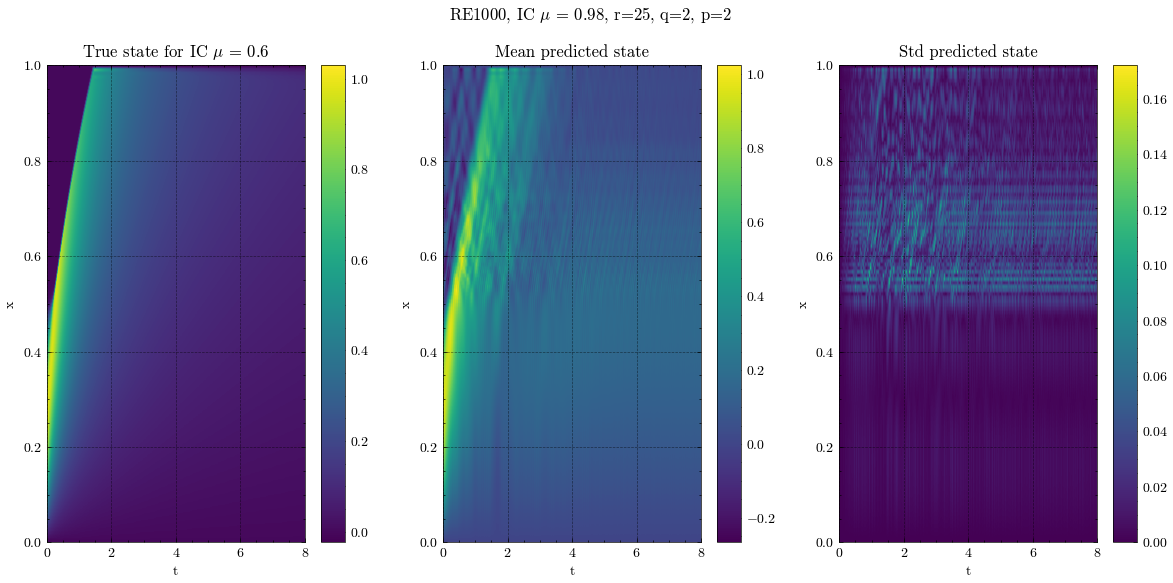

In [ ]:
# plot the results side by side
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming s_ref_all is a list of 2D numpy arrays
for i in range(1):
    fig, axs = plt.subplots(1, 3, figsize=(12, 6))
    XX, YY = np.meshgrid(np.linspace(0.0, T_end_full, int(mean_s_rec_full.shape[0])), np.linspace(0.0, 1.0, mean_s_rec_full.shape[1]))
    print("X = ", XX.shape)
    print("Y = ", YY.shape)
    print("s_ref_all[i] = ", mean_s_rec_full_testing.shape)
    # s = ax.plot_surface(X, Y, s_ref_all[i].reshape(N, int(K+1)), cmap='viridis')
    
    c0 = axs[0].imshow(X_all_test.T, extent=[np.min(XX), np.max(XX), np.min(YY), np.max(YY)], origin='lower', aspect='auto')
    fig.colorbar(c0, ax=axs[0], orientation='vertical')
    axs[0].set_xlabel('t')
    axs[0].set_ylabel('x')
    axs[0].set_title(f'True state for IC $\mu$ = {mus[2]}')
    
    c1 = axs[1].imshow(mean_s_rec_full, extent=[np.min(XX), np.max(XX), np.min(YY), np.max(YY)], origin='lower', aspect='auto')
    fig.colorbar(c1, ax=axs[1], orientation='vertical')
    axs[1].set_xlabel('t')
    axs[1].set_ylabel('x')
    axs[1].set_title(f'Mean predicted state')
    
    c2 = axs[2].imshow(std_s_rec_full, extent=[np.min(XX), np.max(XX), np.min(YY), np.max(YY)], origin='lower', aspect='auto')
    # c2 = axs[1].imshow(s_rec_all[i].reshape(N, int(K+1)), extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)], origin='lower', aspect='auto')
    fig.colorbar(c2, ax=axs[2], orientation='vertical')
    axs[2].set_xlabel('t')
    axs[2].set_ylabel('x')
    axs[2].set_title(f'Std predicted state')
    
    
    # fig.colorbar(c1, ax=axs, orientation='horizontal', fraction=0.05, pad=0.05)
    # fig.colorbar(c2, ax=axs, orientation='horizontal', fraction=0.05, pad=0.05)
    plt.suptitle(f"RE1000, IC $\mu$ = 0.98, r={r}, q={q_trunc}, p={p}")
    plt.tight_layout()
    plt.show()

In [ ]:
# find 2 times where there is most uncertainty during training window by quantile
uncertainties_sorted = np.argsort(std_s_rec_full_training.sum(axis=0))
uncertainty_indices = [uncertainties_sorted[-1]]
uncertainty_indices.append(uncertainties_sorted[-100])
# uncertainty_indices = uncertainty_indices.tolist() + [np.argmax(std_s_rec_full_training.sum(axis=0))]
# another time where there is most uncertainty during testing window
uncertainty_indices.append(2300)

In [ ]:
uncertainty_indices

[1792, 1895, 2300]

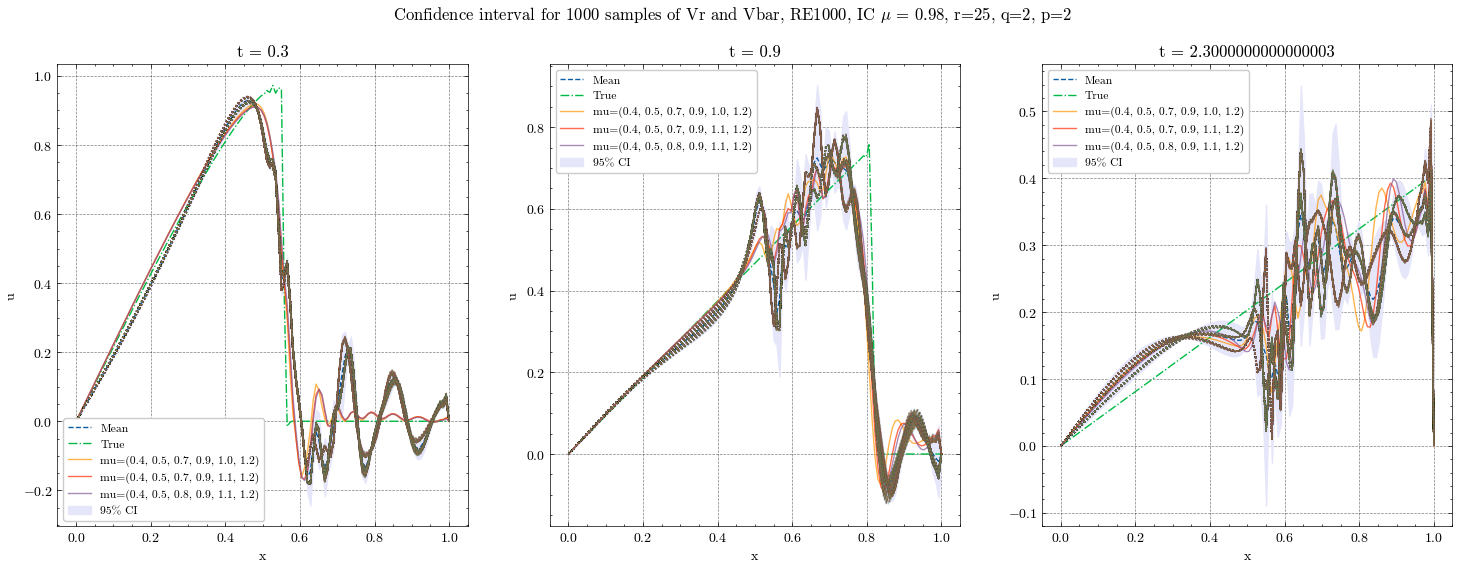

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

# Example setup (you'll need to define mean_s_rec_full, lower_bound, and upper_bound appropriately)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

upper_bound = mean_s_rec_full + confidence_interval
lower_bound = mean_s_rec_full - confidence_interval

s_rec_full_lst_operators_sel = [s_rec_full_lst_operators[i] for i in representatives]

for i, t in enumerate(times):
# for i, index in enumerate(uncertainty_indices):
    ax = axs[i]
    t_index = int(t / dt)  # Ensure dt is defined and properly calculated
    # t_index = index
    
    t = t_index * dt

    # Main plot
    x_values = np.linspace(0, 1, s_rec_full_lst_operators[0].shape[0])
    mean_line = mean_s_rec_full[:, t_index]
    # nominal_line = s_rec_full_nominal[:, t_index]
    true_line = X_all_test.T[:, t_index]
    lower_line = lower_bound[:, t_index]
    upper_line = upper_bound[:, t_index]
    
    model_lines = [s_rec_full_lst_operators_sel[j][:, t_index] for j in range(len(s_rec_full_lst_operators_sel))]
    
    ax.plot(x_values, mean_line, label='Mean', linestyle="--")
    ax.plot(x_values, true_line, label='True', linestyle="-.")
    for j in range(len(s_rec_full_lst_operators_sel)):
        ax.plot(x_values, model_lines[j], label=names_sel[j], linestyle="-", alpha=0.7)
        
    # for j in range(len(s_rec_full_lst)):
    #     ax.plot(x_values, s_rec_full_lst[j][:, t_index], linestyle=":", alpha=0.1)
    # ax.plot(x_values, nominal_line, label='Nominal', linestyle=":")
    ax.fill_between(x_values, lower_line, upper_line, alpha=1, label='95% CI', color='lavender')
    ax.set_title(f"t = {t}")
    ax.set_xlabel('x')
    ax.set_ylabel('u')
    ax.legend(loc="best", fontsize='small')

    # # Create an inset axis
    # axins = inset_axes(ax, width="25%", height="25%", loc='center right')

    # # Plot the same data on the inset
    # axins.plot(x_values, mean_line, linestyle="--")
    # axins.plot(x_values, true_line, linestyle="-.")
    # axins.plot(x_values, nominal_line, linestyle=":")
    
    # if np.allclose(lower_line, upper_line):
    #     print("Lower and upper bounds are the same")
    #     axins.plot(x_values, lower_line, color='lavender')
    # else:
    #     print("Lower and upper bounds are different")
    #     axins.fill_between(x_values, lower_line, upper_line, color='lavender', alpha=1)

    # # Zoom-in range for the x-axis
    # focus_x_min, focus_x_max = 0.8, 0.81
    # axins.set_xlim(focus_x_min, focus_x_max)
    # axins.set_ylim(np.min(lower_line), np.max(upper_line))

    # # Dynamically determine the y-range based on the focus area
    # mask = (x_values >= focus_x_min) & (x_values <= focus_x_max)
    # focus_y_min = min(np.min(lower_line[mask]), np.min(mean_line[mask]))
    # focus_y_max = max(np.max(upper_line[mask]), np.max(mean_line[mask]))
    # y_margin = (focus_y_max - focus_y_min) * 0.1  # Adjust margin
    # axins.set_ylim(focus_y_min - y_margin, focus_y_max + y_margin)

    # # Optionally remove tick labels to declutter
    # axins.xaxis.set_tick_params(labelbottom=True)
    # axins.yaxis.set_tick_params(labelleft=True)

# plt.tight_layout()
plt.suptitle(f"Confidence interval for 1000 samples of Vr and Vbar, RE1000, IC $\mu$ = 0.98, r={r}, q={q_trunc}, p={p}")
plt.show()
